# Implementation of Harris Corner Detector

In [1]:
# Import necessary functions
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
from pylab import rcParams

In [31]:
# For inline plotting of Matplotlib
%matplotlib inline
# Get current size
plt.rcParams["figure.figsize"] = 10, 10

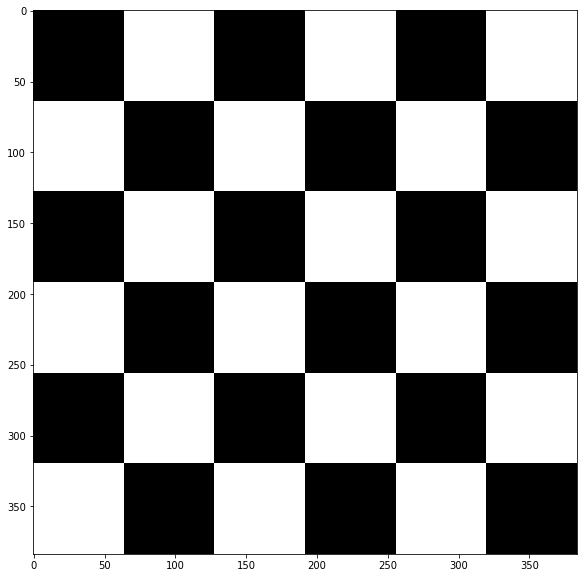

In [32]:
# Read an image
img_path = 'C:/Users/pransen.ORADEV/Desktop/checkerboard.png'
img = imread(img_path)
plt.imshow(img, cmap='gray')

In [33]:
# Using Sobel kernel for computing the gradients
def x_gradient(gray_image):
    kernel_x = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
    grad_x = convolve2d(gray_image, kernel_x, mode='same')
    return grad_x

def y_gradient(gray_image):
    kernel_y = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]
    grad_y = convolve2d(gray_image, kernel_y, mode='same')
    return grad_y

In [34]:
def compute_harris_response(color_img, window_size, k=0.08, thresh=10000):
    # Convert image to Grayscale
    img_gray = rgb2gray(color_img)
    
    color_copy = color_img.copy()
    
    offset = int(window_size/2)
#     Ix = x_gradient(img_gray)
#     Iy = y_gradient(img_gray)
    Iy, Ix = np.gradient(img)
    
    Ixx = Ix * Ix
    Iyy = Iy * Iy
    Ixy = Ix * Iy
    height, width = img_gray.shape
    
    corner_list = list()
    
    for y in range(offset, height-offset):
        for x in range(offset, width-offset):
            Sxx = np.sum(Ixx[y-offset:y+1+offset, x-offset:x+1+offset])
            Syy = np.sum(Iyy[y-offset:y+1+offset, x-offset:x+1+offset])
            Sxy = np.sum(Ixy[y-offset:y+1+offset, x-offset:x+1+offset])
            det = (Sxx * Syy) - (Sxy**2)
            trace = Sxx + Syy
            r = det - k*(trace**2)
            if r > thresh:
                corner_list.append([x, y, r])
                color_copy[y, x] = 127
    return color_copy, corner_list
            
    

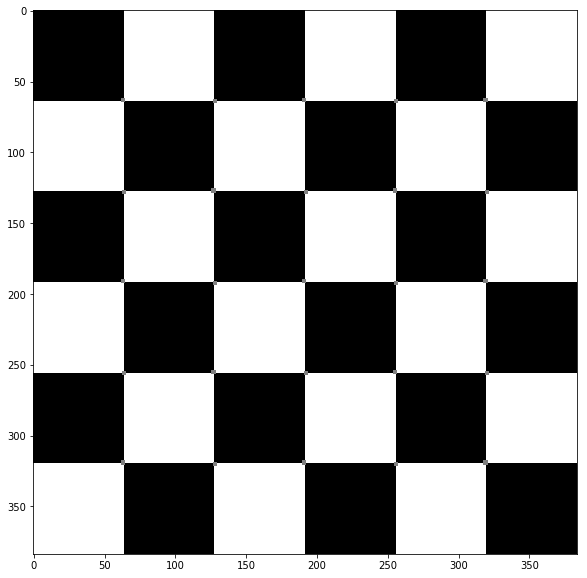

In [35]:
color_copy, corner_list = compute_harris_response(img, 3)
plt.imshow(color_copy, cmap='gray')